# Download FFHQ

In [ ]:
%%writefile kaggle.json
{"username":"potatohd404","key":"7286b6b30ed149c4e43d6c8108908440"}

Writing kaggle.json


In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d 'potatohd404/ffhq-128-70k'
!mkdir datasets
!unzip "ffhq-128-70k.zip" -d "datasets/ffhq-128-70k"
!rm "ffhq-128-70k.zip"
!rm "kaggle.json"

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: datasets/ffhq-128-70k/68499.png  
  inflating: datasets/ffhq-128-70k/685.png  
  inflating: datasets/ffhq-128-70k/6850.png  
  inflating: datasets/ffhq-128-70k/68500.png  
  inflating: datasets/ffhq-128-70k/68501.png  
  inflating: datasets/ffhq-128-70k/68502.png  
  inflating: datasets/ffhq-128-70k/68503.png  
  inflating: datasets/ffhq-128-70k/68504.png  
  inflating: datasets/ffhq-128-70k/68505.png  
  inflating: datasets/ffhq-128-70k/68506.png  
  inflating: datasets/ffhq-128-70k/68507.png  
  inflating: datasets/ffhq-128-70k/68508.png  
  inflating: datasets/ffhq-128-70k/68509.png  
  inflating: datasets/ffhq-128-70k/6851.png  
  inflating: datasets/ffhq-128-70k/68510.png  
  inflating: datasets/ffhq-128-70k/68511.png  
  inflating: datasets/ffhq-128-70k/68512.png  
  inflating: datasets/ffhq-128-70k/68513.png  
  inflating: datasets/ffhq-128-70k/68514.png  
  inflating: datasets/ffhq-128-70k/68515.pn

# Download dcgan

In [ ]:
%%writefile kaggle.json
{"username":"potatohd404","key":"7286b6b30ed149c4e43d6c8108908440"}

Overwriting kaggle.json


In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d 'potatohd404/bad-faces-60k-128x128'
!mkdir datasets
!unzip "bad-faces-60k-128x128.zip" -d "datasets/bad-faces-60k-128x128"
!rm "bad-faces-60k-128x128.zip"
!rm "kaggle.json"

# Download tpdne

In [ ]:
%%writefile kaggle.json
{"username":"potatohd404","key":"7286b6b30ed149c4e43d6c8108908440"}

Writing kaggle.json


In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d 'potatohd404/tpdne-60k-128x128'
!mkdir datasets
!unzip "tpdne-60k-128x128.zip" -d "datasets/tpdne-60k-128x128"
!rm "tpdne-60k-128x128.zip"
!rm "kaggle.json"

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: datasets/tpdne-60k-128x128/59499.png  
  inflating: datasets/tpdne-60k-128x128/595.png  
  inflating: datasets/tpdne-60k-128x128/5950.png  
  inflating: datasets/tpdne-60k-128x128/59500.png  
  inflating: datasets/tpdne-60k-128x128/59501.png  
  inflating: datasets/tpdne-60k-128x128/59502.png  
  inflating: datasets/tpdne-60k-128x128/59503.png  
  inflating: datasets/tpdne-60k-128x128/59504.png  
  inflating: datasets/tpdne-60k-128x128/59505.png  
  inflating: datasets/tpdne-60k-128x128/59506.png  
  inflating: datasets/tpdne-60k-128x128/59507.png  
  inflating: datasets/tpdne-60k-128x128/59508.png  
  inflating: datasets/tpdne-60k-128x128/59509.png  
  inflating: datasets/tpdne-60k-128x128/5951.png  
  inflating: datasets/tpdne-60k-128x128/59510.png  
  inflating: datasets/tpdne-60k-128x128/59511.png  
  inflating: datasets/tpdne-60k-128x128/59512.png  
  inflating: datasets/tpdne-60k-128x128/59513.png  


# Import Dataset

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
np.random.seed(69)
#@title Form1
#@markdown Input the fields
## LOADING DATASET
dataset = 'bad-faces-60k-128x128' #@param ['tpdne-60k-128x128', 'bad-faces-60k-128x128', 'ffhq-128-70k']
count = 12000  #@param {type: "number"}

images = []
for i in range(count):
    dirname = f'/content/datasets/{dataset}/{i}.png'  
    img = cv2.imread(dirname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

images = np.array(images)
#@markdown ---



# Train Autoencoder

In [ ]:
images.shape

(12000, 128, 128, 3)

In [ ]:
count = int(images.shape[0]*0.80)
train, test = images[:count,:], images[count:,:]

In [ ]:
train = train / 255
test = test / 255

In [ ]:
train.shape, test.shape, train.dtype

((9600, 128, 128, 3), (2400, 128, 128, 3), dtype('float16'))

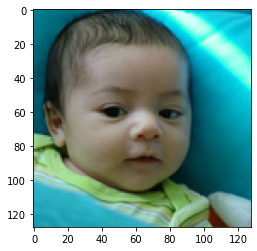

In [ ]:
plt.imshow(train[0])

In [ ]:
train[0]

array([[[0.     , 0.51   , 0.5728 ],
        [0.     , 0.502  , 0.565  ],
        [0.     , 0.4902 , 0.5527 ],
        ...,
        [0.     , 0.4707 , 0.608  ],
        [0.     , 0.4587 , 0.6    ],
        [0.     , 0.451  , 0.5923 ]],

       [[0.     , 0.506  , 0.5767 ],
        [0.     , 0.4941 , 0.5566 ],
        [0.     , 0.498  , 0.565  ],
        ...,
        [0.     , 0.4392 , 0.5923 ],
        [0.     , 0.4392 , 0.5923 ],
        [0.     , 0.443  , 0.596  ]],

       [[0.     , 0.4824 , 0.5605 ],
        [0.     , 0.4902 , 0.5566 ],
        [0.00392, 0.51   , 0.5767 ],
        ...,
        [0.00392, 0.4707 , 0.6157 ],
        [0.     , 0.4314 , 0.5845 ],
        [0.     , 0.4197 , 0.5767 ]],

       ...,

       [[0.0941 , 0.612  , 0.6743 ],
        [0.102  , 0.6157 , 0.678  ],
        [0.1137 , 0.6196 , 0.686  ],
        ...,
        [0.549  , 0.6665 , 0.686  ],
        [0.541  , 0.639  , 0.6587 ],
        [0.5293 , 0.6196 , 0.639  ]],

       [[0.0902 , 0.6    , 0.6626 ],
  

In [ ]:
del images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras.engine.keras_tensor import disable_keras_tensors, keras_tensors_enabled
import tensorflow as tf



# enable_eager_execution()
# disable_keras_tensors()
# tf.config.experimental_run_functions_eagerly(True)
# itself
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
strategy = tf.distribute.TPUStrategy(resolver)

print("REPLICAS: ", strategy.num_replicas_in_sync)

np.random.seed(1)

INFO:tensorflow:Initializing the TPU system: grpc://10.93.87.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.93.87.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [ ]:
INPUT_DIM = (128,128,3) # Image dimension
Z_DIM = 1024 # Dimension of the latent vector (z)

In [ ]:
# ENCODER
def build_vae_encoder(input_dim, output_dim, conv_filters, conv_kernel_size,
                      conv_strides, use_batch_norm=False, use_dropout=False):
       # pylint: disable=protected-access

      n_layers = len(conv_filters)
      
      encoder_input = Input(shape=input_dim, name='encoder_input')
      x = encoder_input
    
      for i in range(n_layers):
          x = Conv2D(filters=conv_filters[i],
                    kernel_size=conv_kernel_size[i],
                    strides=conv_strides[i],
                    padding='same',
                    name='encoder_conv_' + str(i)
                    )(x)
          if use_batch_norm:
              x = BathcNormalization()(x)

          x = LeakyReLU()(x)

          if use_dropout:
              x = Dropout(rate=0.25)(x)
      shape_before_flattening = K.int_shape(x)[1:]
     
      x = Flatten()(x)

      mean_mu = Dense(output_dim, name='mu')(x)
      log_var = Dense(output_dim, name='log_var')(x)
      def sampling(args):
        # with strategy.scope():
          mean_mu, log_var = args
          epsilon = K.random_normal(shape=K.shape(mean_mu), mean=0., stddev=1.)
          return mean_mu + K.exp(log_var / 2) * epsilon

      encoder_output = Lambda(sampling, name='encoder_output')([mean_mu, log_var])
      return encoder_input, encoder_output, mean_mu, log_var, shape_before_flattening, Model(encoder_input,
                                                                                            encoder_output)

global K
K.clear_session()
with strategy.scope():
  vae_encoder_input, vae_encoder_output, mean_mu, log_var, vae_shape_before_flattening, vae_encoder = build_vae_encoder(
      input_dim=INPUT_DIM,
      output_dim=Z_DIM,
      conv_filters=[32, 64, 64, 64],
      conv_kernel_size=[3, 3, 3, 3],
      conv_strides=[2, 2, 2, 2])




In [ ]:
def build_decoder(input_dim, shape_before_flattening, conv_filters, conv_kernel_size, 
                  conv_strides):
    n_layers = len(conv_filters)

    decoder_input = Input(shape = (input_dim,) , name = 'decoder_input')

    x = Dense(np.prod(shape_before_flattening))(decoder_input)
    x = Reshape(shape_before_flattening)(x)

    for i in range(n_layers):
        x = Conv2DTranspose(filters = conv_filters[i], 
                    kernel_size = conv_kernel_size[i],
                    strides = conv_strides[i], 
                    padding = 'same',
                    name = 'decoder_conv_' + str(i)
                    )(x)
        
        if i < n_layers - 1:
          x = LeakyReLU()(x)
        else:
          x = Activation('sigmoid')(x)

    decoder_output = x
    return decoder_input, decoder_output, Model(decoder_input, decoder_output)

with strategy.scope():
  vae_decoder_input, vae_decoder_output, vae_decoder = build_decoder(input_dim = Z_DIM,
                                          shape_before_flattening = vae_shape_before_flattening,
                                          conv_filters = [64,64,32,3],
                                          conv_kernel_size = [3,3,3,3],
                                          conv_strides = [2,2,2,2])

In [ ]:
with strategy.scope():
  vae_input = vae_encoder_input
  vae_output = vae_decoder(vae_encoder_output) 

  vae_model = Model(vae_input, vae_output)

  vae_model.summary()



Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 64, 64, 32)   896         encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 64, 64, 32)   0           encoder_conv_0[0][0]             
__________________________________________________________________________________________________
encoder_conv_1 (Conv2D)         (None, 32, 32, 64)   18496       leaky_re_lu[0][0]                
____________________________________________________________________________________________

In [ ]:
train.shape, test.shape, train.dtype

((9600, 128, 128, 3), (2400, 128, 128, 3), dtype('float16'))

In [ ]:
N_EPOCHS = 200
LOSS_FACTOR = 10000
# LOSS_FACTOR = np.prod(INPUT_DIM)
LEARNING_RATE = 0.001
BATCH_SIZE = 256
def kl_loss(y_true, y_pred): # special loss, required for VAEs
  return -0.5 * K.sum(1 + log_var - K.square(mean_mu) - K.exp(log_var),axis=1)

def total_loss(y_true, y_pred):
  kl = kl_loss(y_true, y_pred)
  r = r_loss(y_true, y_pred)
  # print(tmp1, tmp2)
  return LOSS_FACTOR*r + kl, kl, r

def r_loss(y_true, y_pred):
  return K.mean(K.square(y_true - y_pred),axis=[1,2,3])

def vae_loss(x, x_decoded_mean):
    # xent_loss = tf.keras.losses.binary_crossentropy(x, x_decoded_mean)
    xent_loss = tf.keras.losses.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + log_var - K.square(mean_mu) - K.exp(log_var))
    return xent_loss + kl_loss, kl_loss, xent_loss

with strategy.scope():
  # tf.config.experimental_run_functions_eagerly(False)
  t_loss, kl1_loss, r1_loss = total_loss(vae_input, vae_output)
  # t_loss, kl1_loss, r1_loss = vae_loss(vae_input, vae_output)
  vae_model.add_loss(t_loss)
  vae_model.add_metric(kl1_loss, name="kl_loss")
  vae_model.add_metric(r1_loss, name="r_loss")
  adam_optimizer = Adam(lr = LEARNING_RATE)
  # vae_model.compile(optimizer=adam_optimizer, loss=total_loss, metrics = [r_loss, kl_loss])
  vae_model.compile(optimizer=adam_optimizer)
  vae_model.fit(train, train,
              epochs=N_EPOCHS,
              batch_size=BATCH_SIZE,
              shuffle=True,
              validation_data=(test, test))
 
# checkpoint_vae = ModelCheckpoint(os.path.join(WEIGHTS_FOLDER, 'VAE/weights.h5'), save_weights_only = True, verbose=1)
# validation_data=(test, test)


# steps_per_epoch=NUM_IMAGES / BATCH_SIZE,
# callbacks=[checkpoint_vae]

Epoch 1/200
38/38 [==============================] - 34s 621ms/step - loss: 720.4818 - kl_loss: 8.9630 - r_loss: 0.0660 - val_loss: 504.5378 - val_kl_loss: 20.0550 - val_r_loss: 0.0484
Epoch 2/200
38/38 [==============================] - 2s 53ms/step - loss: 446.6062 - kl_loss: 37.3321 - r_loss: 0.0378 - val_loss: 369.4429 - val_kl_loss: 44.1718 - val_r_loss: 0.0325
Epoch 3/200
38/38 [==============================] - 2s 53ms/step - loss: 357.0657 - kl_loss: 45.7279 - r_loss: 0.0304 - val_loss: 337.3463 - val_kl_loss: 48.6047 - val_r_loss: 0.0289
Epoch 4/200
38/38 [==============================] - 2s 53ms/step - loss: 330.9754 - kl_loss: 51.9120 - r_loss: 0.0276 - val_loss: 327.6730 - val_kl_loss: 49.8922 - val_r_loss: 0.0278
Epoch 5/200
38/38 [==============================] - 2s 53ms/step - loss: 320.8133 - kl_loss: 55.5285 - r_loss: 0.0263 - val_loss: 319.9419 - val_kl_loss: 59.0741 - val_r_loss: 0.0261
Epoch 6/200
38/38 [==============================] - 2s 52ms/step - loss: 311.4

In [ ]:
predict_vects = vae_model.predict(test)

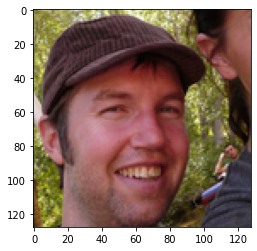

In [ ]:
plt.imshow(test[2])

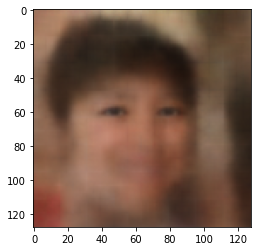

In [ ]:
plt.imshow(predict_vects[2])

In [ ]:
vae_encoder.predict(test)[0]

array([ 1.0154196 ,  0.5246372 ,  2.3719656 , ...,  1.2964413 ,
        0.88642687, -0.47402632], dtype=float32)

In [ ]:
vae_model.save('experiment1_ffhq.h5')

In [ ]:
images.shape

NameError: ignored

In [ ]:
test = images[:5000,:]

In [ ]:
test[0]

In [ ]:
test = test.astype('float16') / 255
test

In [ ]:
test[0]

In [ ]:
train.shape, test.shape

In [ ]:
predict_vects = vae_encoder.predict(test)

In [ ]:
# saving vectors to make further research

with open('bad_faces_latent_vectors.npy', 'wb') as f:
    np.save(f, predict_vects)

In [ ]:
predict_vects.shape

In [ ]:
from google.colab import drive
drive.mount('/content/drive')